Punto 17

In [298]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [299]:
x= sym.Symbol('x',real=True)
y= sym.Symbol('y',real=True)

In [300]:
z=x+sym.I*y
z

x + I*y

In [301]:
def f(x,y):
    
    z = x + sym.I*y
    f = z**3 - 1
    f = f.expand()
    return sym.re(f),sym.im(f)
f0,f1 = f(x,y)
F = [f0,f1]
F


[x**3 - 3*x*y**2 - 1, 3*x**2*y - y**3]

In [302]:

    J = sym.zeros(2,2)

    for i in range(2):
        for j in range(2):
            if j==0:
                J[i,j] = sym.diff(f_l[i],x,1)
            else:
                J[i,j] = sym.diff(f_l[i],y,1)
 
InvJ = J.inv(method='LU')
InvJ

Matrix([
[(-36*x**2*y**2/((3*x**2 - 3*y**2)*(36*x**2*y**2/(3*x**2 - 3*y**2) + 3*x**2 - 3*y**2)) + 1)/(3*x**2 - 3*y**2), 6*x*y/((3*x**2 - 3*y**2)*(36*x**2*y**2/(3*x**2 - 3*y**2) + 3*x**2 - 3*y**2))],
[                               -6*x*y/((3*x**2 - 3*y**2)*(36*x**2*y**2/(3*x**2 - 3*y**2) + 3*x**2 - 3*y**2)),                         1/(36*x**2*y**2/(3*x**2 - 3*y**2) + 3*x**2 - 3*y**2)]])

In [303]:
Fn = sym.lambdify([x,y],F,'numpy')
Jn = sym.lambdify([x,y],J,'numpy')

Fn(0.5,0.5)
Jn(0.5,0.5)



array([[ 0. , -1.5],
       [ 1.5,  0. ]])

In [304]:
def Newton_Raphson(z,F,J,e=1*10**-7,it=1000):
    z_n=[0.5,0.5]
    norma=1.0
    i=0
    
    while norma>e and i < it:
        IFn = np.array(Fn(z[0],z[1]))
        aJn = Jn(z[0],z[1])    
        IJn=np.linalg.inv(aJn)

        z_n = z - np.dot(IJn,IFn)
        norma=np.linalg.norm(z-z_n)
        z=z_n
        i+=1
    return z_n

In [305]:
Newton_Raphson([-0.5,-0.5],Fn,Jn)

array([-0.5      , -0.8660254])

In [306]:
N=300
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)

In [307]:

def fracture(x,y,Fn,Jn,N):
    Fractal = np.zeros((N,N), np.int64)
    z1= Newton_Raphson([0.5,0.5],Fn,Jn).round(3)
    z2=Newton_Raphson([-0.5,-0.5],Fn,Jn).round(3)
    z3=Newton_Raphson([0.005,0.0005],Fn,Jn).round(3)
    for i in range(N):
        for j in range(N):
            
            raiz=Newton_Raphson([x[i],y[j]],Fn,Jn)
            print(raiz[1])
            if raiz[1].round(3)==z1[1]:
                Fractal[i][j]=20
            if raiz[1].round(3)==z2[1]:
                Fractal[i][j]=100
            if raiz[0].round(3)==z3[0]:
                Fractal[i][j]=255
            
    return Fractal




In [308]:
Fractal= fracture(x,y,Fn,Jn,300)

-0.8660254037844386
-0.8660254037844387
-0.8660254037844386
-0.8660254037844387
-0.8660254037844387
-0.8660254037844387
-0.8660254037844387
-0.8660254037844387
-0.8660254037844386
-0.8660254037844386
-0.8660254037844387
-0.8660254037844387
-0.8660254037844387
-0.8660254037844386
-0.8660254037844387
-0.8660254037844386
-0.8660254037844387
-0.8660254037844387
-0.8660254037844387
-0.8660254037844386
-0.8660254037844387
-0.8660254037844386
-0.8660254037844387
-0.8660254037844387
-0.8660254037844387
-0.8660254037844387
-0.8660254037844387
-0.8660254037844387
-0.8660254037844387
-0.8660254037844387
-0.8660254037844387
-0.8660254037844386
-0.8660254037844386
-0.8660254037844386
-0.8660254037844386
-0.8660254037844386
-0.8660254037844387
-0.8660254037844386
-0.8660254037844387
-0.8660254037844387
-0.8660254037844386
-0.8660254037844386
-0.8660254037844387
-0.8660254037844386
-0.8660254037844387
-0.8660254037844387
-0.8660254037844387
-0.8660254037844386
-0.8660254037844386
-0.8660254037844386


0.8660254037844387
0.8660254037844386
0.8660254037844387
0.8660254037844386
0.8660254037844386
0.8660254037844386
0.8660254037844386
0.8660254037844386
0.8660254037844387
0.8660254037844387
0.8660254037844387
0.8660254037844387
0.8660254037844387
0.8660254037844387
0.8660254037844387
0.8660254037844387
0.8660254037844387
0.8660254037844386
0.8660254037844387
0.8660254037844386
0.8660254037844387
0.8660254037844387
0.8660254037844387
0.8660254037844386
0.8660254037844387
0.8660254037844386
0.8660254037844387
0.8660254037844387
0.8660254037844387
0.8660254037844386
0.8660254037844386
0.8660254037844387
0.8660254037844387
0.8660254037844387
0.8660254037844387
0.8660254037844387
0.8660254037844386
0.8660254037844387
0.8660254037844386
-0.8660254037844386
-0.8660254037844386
-0.8660254037844386
-0.8660254037844386
-0.8660254037844386
-0.8660254037844387
-0.8660254037844387
-0.8660254037844387
-0.8660254037844387
-0.8660254037844386
-0.8660254037844386
-0.8660254037844386
-0.8660254037844386

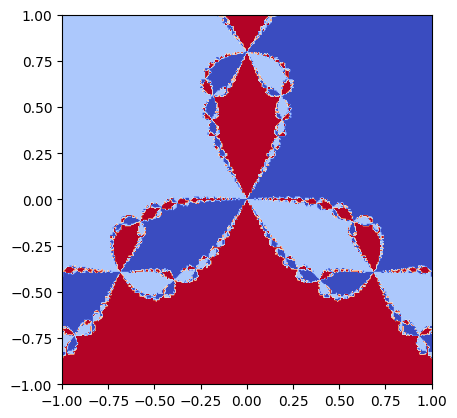

In [309]:
plt.imshow(Fractal, cmap='coolwarm' ,extent=[-1,1,-1,1])